<a href="https://colab.research.google.com/github/a-afonso/03MAIR-Algoritmos-de-optimizacion/blob/master/Utilidades/Seminario_Problema_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4
3


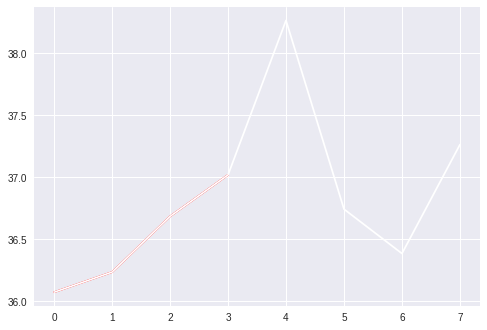

[[34.09285543909882,
  36.26378056839686,
  36.841125232798284,
  37.099819573803956,
  36.07439520352448,
  1.0254243702794739],
 [34.49366147436675,
  36.290005359731,
  37.063215387723275,
  37.099819573803956,
  36.23667544890624,
  0.8631441248977154],
 [35.091872485168196,
  36.42084584670635,
  38.129969950313345,
  37.099819573803956,
  36.68562696399796,
  0.41419260980599404],
 [35.865265381817686,
  36.73184137495878,
  38.38337418139552,
  37.099819573803956,
  37.020075127993984,
  0.07974444580997186],
 [39.62298241100138,
  41.844123314399546,
  34.49366147436675,
  37.099819573803956,
  38.26514669339291,
  1.1653271195889516],
 [39.36237519918356,
  36.42084584670635,
  34.09285543909882,
  37.099819573803956,
  36.743974014698175,
  0.35584555910578075],
 [35.091872485168196,
  37.063215387723275,
  36.290005359731,
  37.099819573803956,
  36.386228201606606,
  0.7135913721973495],
 [36.73184137495878,
  36.841125232798284,
  38.38337418139552,
  37.099819573803956,
 

In [47]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt

# Inicialización de variables globales
nAnimals = 30
nTreats = 2
nGroups = 2

# Creación de un dataset de muestra
MUESTRA = pd.DataFrame()
MUESTRA["Id"] = [i for i in range(nAnimals)]
MUESTRA["Peso"] = [random.gauss(37, 2.1) for i in range(nAnimals)]
MUESTRA["Sexo"] = [random.getrandbits(1) for i in range(nAnimals)]

# Dividimos el dataset en dos listas, una para cada sexo
MALE = []
FEMALE = []

for index, row in MUESTRA.iterrows():
  if row["Sexo"] == 0:
    MALE.append([row["Id"], row["Peso"]])
  else:
    FEMALE.append([row["Id"], row["Peso"]])

# Calcula el número máximo de animales por grupo
nMale = len(MALE)
nFemale = len(FEMALE)

nAnimalsGroup = min(nMale, nFemale) // (nTreats * nGroups)

# Función para agrupar una lista de cualquier sexo
def group_animals(L, nTreats, nGroups, nAnimalsGroup):
  RES = []
  
  # Calcula el peso medio
  p_medio = np.mean(L, axis=0)[1]
  
  # Calcula el número total de grupos
  nTotalGroups = nTreats * nGroups
  
  # Calcula el número de animales de la lista
  nAnimalsSex = nTotalGroups * nAnimalsGroup
  
  # Ordenamos la muestra por peso
  LUNSORTED = L
  LSORTED = sorted(L, key=lambda x : x[1])
  #for x in L: print(x)
  
  print(nTotalGroups)
  print(nAnimalsGroup)
    
  for i in range(nTotalGroups):
    G = []
    for j in range(i, nAnimalsSex, nTotalGroups):
      G.append(LSORTED[j][1])
    G.append(p_medio)
    m = np.mean(G)
    G.append(m)
    G.append(abs(p_medio - m))
      
    RES.append(G)
    
  X = []
  for x in RES: 
    X.append(x[4])
    
  for i in range(nTotalGroups):
    G = []
    for j in range(i, nAnimalsSex, nTotalGroups):
      G.append(LUNSORTED[j][1])
    G.append(p_medio)
    m = np.mean(G)
    G.append(m)
    G.append(abs(p_medio - m))
      
    RES.append(G)
  
  Y = []
  for y in RES: 
    Y.append(y[4])

  plt.plot(X, 'r', label='linear')
  plt.plot(Y, 'w', label='linear')
  plt.show()
  
  return RES
  
group_animals(MALE, nTreats, nGroups, nAnimalsGroup)  
  

# Creamos una lista que contendrá los individuos de cada grupo




#


